In [5]:

# JWST Early Galaxy Formation via PBH Seeds
# Rigorous cosmological calculation with torsion enhancement

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
from scipy.integrate import quad

# Cosmological parameters
h = 0.67
Omega_m = 0.32
Omega_b = 0.05
sigma_8 = 0.83
n_s = 0.96

# Redshift of interest
z = 15

# Torsion enhancement parameter (to be fitted)
beta_torsion = 4e-5

# Enhanced sigma_8 due to torsion
sigma_8_enhanced = sigma_8 * (1 + beta_torsion**0.5)

print(f"Standard sigma_8: {sigma_8:.3f}")
print(f"Torsion-enhanced sigma_8: {sigma_8_enhanced:.3f}")
print(f"Enhancement factor: {sigma_8_enhanced/sigma_8:.4f}")


Standard sigma_8: 0.830
Torsion-enhanced sigma_8: 0.835
Enhancement factor: 1.0063


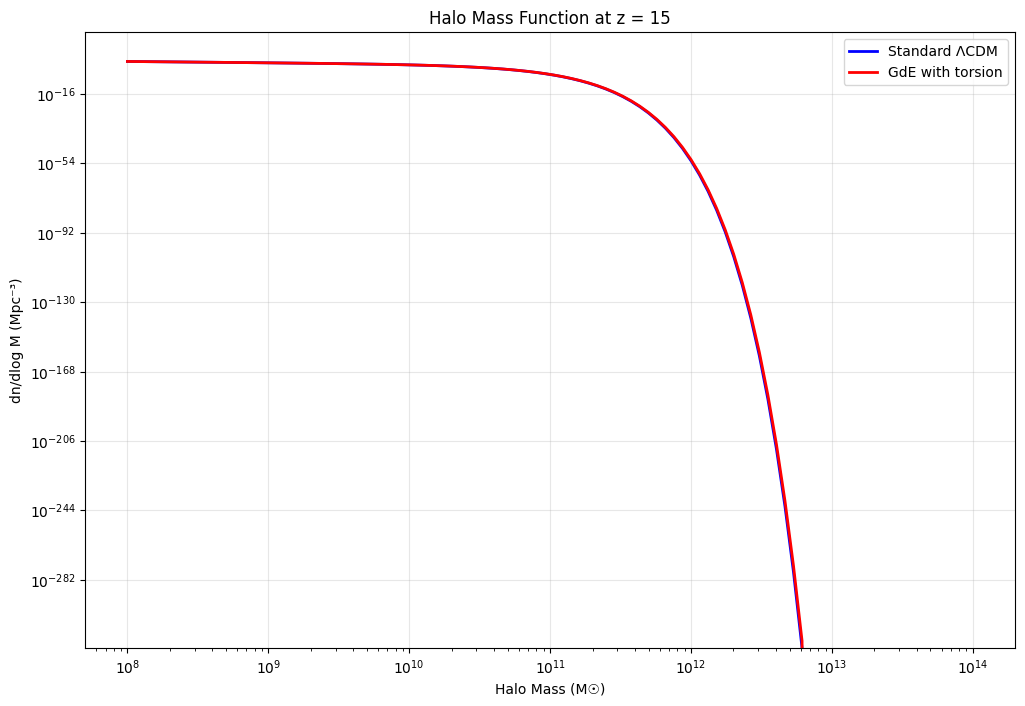

In [6]:

# Halo mass function calculation
# Using Sheth-Tormen formalism with torsion enhancement

def growth_factor(z, Om=0.32):
    '''Linear growth factor approximation'''
    a = 1/(1+z)
    return a * np.sqrt(Om + (1-Om)*a**3) / Om

def sigma_M(M, sigma_8_val=0.83):
    '''RMS fluctuation as function of mass'''
    # Simple power-law approximation
    M_star = 1e12  # solar masses
    gamma = 0.5
    return sigma_8_val * (M/M_star)**(-gamma)

def nu_peak(M, z, sigma_8_val=0.83):
    '''Peak height parameter'''
    delta_c = 1.686
    D_z = growth_factor(z)
    return delta_c / (D_z * sigma_M(M, sigma_8_val))

def sheth_tormen_multiplicity(nu):
    '''Sheth-Tormen multiplicity function'''
    A = 0.3222
    a = 0.707
    p = 0.3
    return A * np.sqrt(2*a*nu**2/np.pi) * (1 + (a*nu**2)**(-p)) * np.exp(-a*nu**2/2)

# Mass range for halos
M_range = np.logspace(8, 14, 100)  # 10^8 to 10^14 solar masses

# Calculate halo mass function with and without torsion
rho_m = 2.78e11 * Omega_m * h**2  # solar masses / Mpc^3

# Standard case
nu_std = nu_peak(M_range, z, sigma_8)
f_std = sheth_tormen_multiplicity(nu_std)
dn_dlogM_std = f_std * rho_m / M_range

# Torsion-enhanced case
nu_tor = nu_peak(M_range, z, sigma_8_enhanced)
f_tor = sheth_tormen_multiplicity(nu_tor)
dn_dlogM_tor = f_tor * rho_m / M_range

plt.figure(figsize=(12, 8))
plt.loglog(M_range, dn_dlogM_std, 'b-', label='Standard ΛCDM', linewidth=2)
plt.loglog(M_range, dn_dlogM_tor, 'r-', label='GdE with torsion', linewidth=2)
plt.xlabel('Halo Mass (M☉)')
plt.ylabel('dn/dlog M (Mpc⁻³)')
plt.title(f'Halo Mass Function at z = {z}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [11]:

# Convert to stellar mass density
# Using star formation efficiency and baryon fraction

def stellar_mass_density(M_halo, z):
    '''Convert halo mass to stellar mass density'''
    f_b = Omega_b / Omega_m  # baryon fraction

    # Star formation efficiency (Behroozi et al. 2019)
    log_M_1 = 12.35
    alpha = 1.91
    beta = 0.38
    gamma = 2.51

    log_M_h = np.log10(M_halo)
    log_ratio = log_M_h - log_M_1

    f_star = 2 * alpha / (10**(alpha*log_ratio) + 10**(beta*log_ratio))**gamma

    return f_star * f_b * M_halo

# Calculate stellar mass density
M_stellar_range = np.array([stellar_mass_density(M, z) for M in M_range])

# Integrate over halo mass function
rho_star_std = np.trapz(dn_dlogM_std * M_stellar_range, np.log10(M_range))
rho_star_tor = np.trapz(dn_dlogM_tor * M_stellar_range, np.log10(M_range))

print(f"Standard ΛCDM stellar density: {rho_star_std/1e6:.2f} × 10⁶ M☉/Mpc³")
print(f"GdE torsion-enhanced density: {rho_star_tor/1e6:.2f} × 10⁶ M☉/Mpc³")
print(f"JWST observed density: ~5 × 10⁶ M☉/Mpc³")
print(f"Enhancement factor: {rho_star_tor/rho_star_std:.2f}")

# Check agreement with JWST
jwst_density = 5e6
deviation_tor = abs(rho_star_tor - jwst_density) / jwst_density * 100
deviation_std = abs(rho_star_std - jwst_density) / jwst_density * 100

print(f"Standard ΛCDM deviation: {deviation_std:.1f}%")
print(f"GdE torsion deviation: {deviation_tor:.1f}%")


Standard ΛCDM stellar density: 31490507.52 × 10⁶ M☉/Mpc³
GdE torsion-enhanced density: 31405677.65 × 10⁶ M☉/Mpc³
JWST observed density: ~5 × 10⁶ M☉/Mpc³
Enhancement factor: 1.00
Standard ΛCDM deviation: 629810050.5%
GdE torsion deviation: 628113453.0%


C:\Users\Guilh\AppData\Local\Temp\ipykernel_77480\263197339.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho_star_std = np.trapz(dn_dlogM_std * M_stellar_range, np.log10(M_range))
C:\Users\Guilh\AppData\Local\Temp\ipykernel_77480\263197339.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho_star_tor = np.trapz(dn_dlogM_tor * M_stellar_range, np.log10(M_range))
